# Oblig 1 STK4900
I chose to solve the mandatory assignment in a Jupyter Notebook. Using the tool "rpy2" I can use Python and R in the same code. This enables me to solve most tasks in Python as I am more familiar with Python than R while still being able to resort to R when needed.

In [2]:
# Loading in R:
%load_ext rpy2.ipython

/Users/bernhard/.local/share/virtualenvs/STK4900-oblig1-uunOJvex/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [44]:
# Automatically making my code look nice
%load_ext nb_black

<IPython.core.display.Javascript object>

In [52]:
# Importing common Python packages
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn import linear_model as skllm
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

## Task 1 a)

In [45]:
# Loading in dataframe.
df = pd.read_csv("no2.txt", delimiter="\s+")
df

,log.no2,log.cars,temp,wind.speed,hour.of.day
0,3.71844,7.69120,9.2,4.8,20
1,3.10009,7.69894,6.4,3.5,14
2,3.31419,4.81218,-3.7,0.9,4
3,4.38826,6.95177,-7.2,1.7,23
4,4.34640,7.51806,-1.3,2.6,11
...,...,...,...,...,...
495,4.30946,7.68202,3.5,5.0,11
496,2.94444,6.52942,9.5,6.5,10
497,4.17439,7.75791,5.2,4.6,14
498,2.95491,5.78996,8.4,0.5,7


<IPython.core.display.Javascript object>

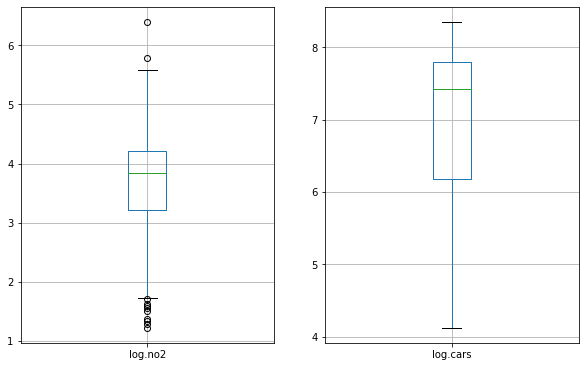

Cars: 7.0+-1.1
NO2: 3.7+-0.7


<IPython.core.display.Javascript object>

In [46]:
mean_cars = np.mean(df["log.cars"])
stddev_cars = np.std(df["log.cars"])
mean_no2 = np.mean(df["log.no2"])
stddev_no2 = np.std(df["log.no2"])
fig, ax = plt.subplots(1, 2, figsize=[10, 10 / 1.618])
df.boxplot("log.no2", ax=ax[0])
df.boxplot("log.cars", ax=ax[1])
plt.show()
print(f"Cars: {mean_cars:.1f}+-{stddev_cars:.1f}")
print(f"NO2: {mean_no2:.1f}+-{stddev_no2:.1f}")

There are more outliers in NO2.

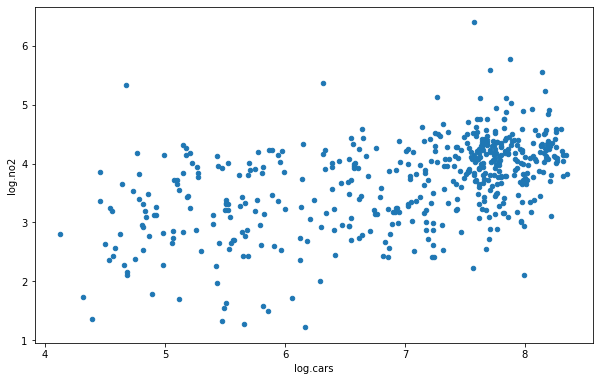

<IPython.core.display.Javascript object>

In [80]:
fig, ax = plt.subplots(1, 1, figsize=[10, 10 / 1.618])
df.plot.scatter(x="log.cars", y="log.no2", ax=ax)
plt.show()

Seems like more traffic leads to more NO2. 

## Task 1 b)

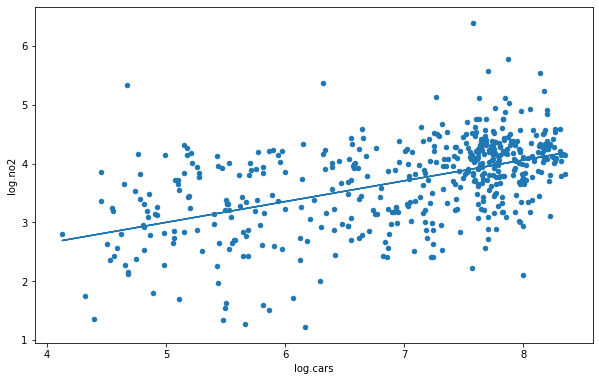

The linear model is: log.no2 = 0.4*log.cars + 1.2
The model has an R^2 score of 0.26


<IPython.core.display.Javascript object>

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10 / 1.618))
linear_model = skllm.LinearRegression()
linear_model.fit(df["log.cars"].to_numpy().reshape(-1, 1), df["log.no2"])
r2 = linear_model.score(df["log.cars"].to_numpy().reshape(-1, 1), df["log.no2"])
y_pred = linear_model.predict(df["log.cars"].to_numpy().reshape(-1, 1))
ax.plot(df["log.cars"].to_numpy(), y_pred)
df.plot.scatter(x="log.cars", y="log.no2", ax=ax)
plt.show()
print(
    f"The linear model is: log.no2 = {linear_model.coef_[0]:.1f}*log.cars + {linear_model.intercept_:.1f}"
)
print(f"The model has an R^2 score of {r2:.2f}")

The R2 score is not very impressive even if the model looks pretty alright by eye. There is definetly a correlation between cars and NO2 though.
The intercept of the model being >0 implies that there will always be a base level of NO2 even without traffic, which makes sense.